In [1]:
#!pip install pandas matplotlib scikit-learn torch torchvision
#!pip install scikit-learn

In [2]:
import gzip
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time as time_module

In [3]:
def load_dataframe_from_gz(gz_file_path):
    # Decompress the .gz file and read its content
    with gzip.open(gz_file_path, 'rt') as file:
        df = pd.read_csv(file)
    return df

In [4]:
# Define the paths to your files
file_paths = [
    "sample_data/20211103_book_updates.csv.gz",
    "sample_data/20211104_book_updates.csv.gz",
    "sample_data/20211105_book_updates.csv.gz"
]

# Initialize an empty DataFrame
deep = pd.DataFrame()

# Loop through each file and append its contents to the DataFrame
for file_path in file_paths:
    temp_df = load_dataframe_from_gz(file_path)
    deep = pd.concat([deep, temp_df], ignore_index=True)

In [5]:
print(deep)

                       COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  \
0        2021-11-03 13:30:00.001579008      205587   ASK_UPDATE   AAPL   
1        2021-11-03 13:30:00.009085952      206658   ASK_UPDATE    CVX   
2        2021-11-03 13:30:00.009085952      206685   ASK_UPDATE   CSCO   
3        2021-11-03 13:30:00.014736896      207709   ASK_UPDATE   INTC   
4        2021-11-03 13:30:00.017669888      208266   ASK_UPDATE    MRK   
...                                ...         ...          ...    ...   
5136114  2021-11-05 20:00:00.189849088    99852128   BID_UPDATE   MSFT   
5136115  2021-11-05 20:00:00.189850112    99852129   BID_UPDATE   MSFT   
5136116  2021-11-05 20:00:00.338157056    99853364   BID_UPDATE      V   
5136117  2021-11-05 20:00:00.340248064    99853398   BID_UPDATE      V   
5136118  2021-11-05 20:00:00.340442112    99853399   BID_UPDATE      V   

         BID_PRICE_1  BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  \
0             150.00           5     

In [6]:

book_updates_df = deep

book_updates_df.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0  2021-11-03 13:30:00.001579008      205587   ASK_UPDATE   AAPL       150.00   
1  2021-11-03 13:30:00.009085952      206658   ASK_UPDATE    CVX       111.38   
2  2021-11-03 13:30:00.009085952      206685   ASK_UPDATE   CSCO        56.55   
3  2021-11-03 13:30:00.014736896      207709   ASK_UPDATE   INTC        48.77   
4  2021-11-03 13:30:00.017669888      208266   ASK_UPDATE    MRK        86.49   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0           5       149.50         105       147.03         100       153.91   
1         100       110.64         100       109.34         100       116.28   
2         200        55.67         300        54.78         100        58.69   
3         100        47.85         300        46.94         500        50.95   
4         100        85.45         100        85.19         100        91.55   

   ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  
0         100       155.51         100       155.91         100  
1         100       117.02         100       118.32         100  
2         200        59.57         100        60.46         100  
3         100        51.87         100        52.78         200  
4         100        92.59         100        92.85         100

In [7]:

book_updates_df["mid_price"] = (book_updates_df["ASK_PRICE_1"]+ book_updates_df["BID_PRICE_1"])/2

book_updates_df.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0  2021-11-03 13:30:00.001579008      205587   ASK_UPDATE   AAPL       150.00   
1  2021-11-03 13:30:00.009085952      206658   ASK_UPDATE    CVX       111.38   
2  2021-11-03 13:30:00.009085952      206685   ASK_UPDATE   CSCO        56.55   
3  2021-11-03 13:30:00.014736896      207709   ASK_UPDATE   INTC        48.77   
4  2021-11-03 13:30:00.017669888      208266   ASK_UPDATE    MRK        86.49   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0           5       149.50         105       147.03         100       153.91   
1         100       110.64         100       109.34         100       116.28   
2         200        55.67         300        54.78         100        58.69   
3         100        47.85         300        46.94         500        50.95   
4         100        85.45         100        85.19         100        91.55   

   ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  mid_price  
0         100       155.51         100       155.91         100    151.955  
1         100       117.02         100       118.32         100    113.830  
2         200        59.57         100        60.46         100     57.620  
3         100        51.87         100        52.78         200     49.860  
4         100        92.59         100        92.85         100     89.020

In [8]:

stock = "AAPL"


In [9]:

aapl_book_updates_df = book_updates_df[book_updates_df["SYMBOL"]==stock]

aapl_book_updates_df.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  \
0   2021-11-03 13:30:00.001579008      205587   ASK_UPDATE   AAPL   
7   2021-11-03 13:30:00.112982016      218240   BID_UPDATE   AAPL   
8   2021-11-03 13:30:00.113346048      218245   BID_UPDATE   AAPL   
9   2021-11-03 13:30:00.115001088      218268   BID_UPDATE   AAPL   
10  2021-11-03 13:30:00.128983040      218728   BID_UPDATE   AAPL   

    BID_PRICE_1  BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  \
0        150.00           5        149.5         105       147.03         100   
7        150.37          85        150.0           5       149.50         105   
8        150.00           5        149.5         105       147.03         100   
9        150.31         300        150.0           5       149.50         105   
10       150.00           5        149.5         105       147.03         100   

    ASK_PRICE_1  ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  \
0        153.91         100       155.51         100       155.91         100   
7        153.91         100       155.51         100       155.91         100   
8        153.91         100       155.51         100       155.91         100   
9        153.91         100       155.51         100       155.91         100   
10       153.91         100       155.51         100       155.91         100   

    mid_price  
0     151.955  
7     152.140  
8     151.955  
9     152.110  
10    151.955

In [10]:
print(len(aapl_book_updates_df))

aapl_book_updates_df = aapl_book_updates_df.dropna()

print(len(aapl_book_updates_df))

937788
937788


In [11]:

# Converting the COLLECTION_TIME to datetime and setting it as the index
df = aapl_book_updates_df.copy()
df['COLLECTION_TIME'] = pd.to_datetime(df['COLLECTION_TIME'])
df.set_index('COLLECTION_TIME', inplace=True)

# Adjusting the aggregation dictionary for OHLC
ohlc_dict = {#'BID_PRICE_1': ['first', 'max', 'min', 'last'],
    #'ASK_PRICE_1': ['first', 'max', 'min', 'last'],
    'mid_price':['first', 'max', 'min', 'last'],
    'BID_SIZE_1': ['sum'],
    'ASK_SIZE_1': ['sum'],
    'BID_SIZE_2': ['sum'],
    'ASK_SIZE_2': ['sum'],
    'BID_SIZE_3': ['sum'],
    'ASK_SIZE_3': ['sum']}

# Resample and aggregate for different time frames
one_sec_candles = df.resample('1S').agg(ohlc_dict)
five_sec_candles = df.resample('5S').agg(ohlc_dict)
one_min_candles = df.resample('1T').agg(ohlc_dict)


# Show the first few rows of each aggregated DataFrame
one_sec_candles.head(), one_min_candles.head(), five_sec_candles.head()



(                    mid_price                            BID_SIZE_1  \
                         first      max      min     last        sum   
 COLLECTION_TIME                                                       
 2021-11-03 13:30:00   151.955  152.140  150.220  150.370       8160   
 2021-11-03 13:30:01   150.370  152.120  150.335  150.335      40378   
 2021-11-03 13:30:02   150.335  152.105  150.335  152.105       2808   
 2021-11-03 13:30:03   152.105  152.120  150.300  152.110      36316   
 2021-11-03 13:30:04   152.110  152.125  150.300  152.125      36942   
 
                     ASK_SIZE_1 BID_SIZE_2 ASK_SIZE_2 BID_SIZE_3 ASK_SIZE_3  
                            sum        sum        sum        sum        sum  
 COLLECTION_TIME                                                             
 2021-11-03 13:30:00       3108       2755       3200       3225       3200  
 2021-11-03 13:30:01      32121      29430      20073      18120      14048  
 2021-11-03 13:30:02        344 

In [12]:
# Flatten the MultiIndex columns
one_sec_candles.columns = ['_'.join(col).strip() for col in one_sec_candles.columns.values]

# Example renaming (you should adjust this according to your needs)
# This is a simple renaming for demonstration; adjust it to match your OHLC logic
new_column_names = {
    # 'BID_PRICE_1_first': 'BID_PRICE_1_open',
    # 'BID_PRICE_1_max': 'BID_PRICE_1_high',
    # 'BID_PRICE_1_min': 'BID_PRICE_1_low',
    # 'BID_PRICE_1_last': 'BID_PRICE_1_close',

    # 'ASK_PRICE_1_first': 'ASK_PRICE_1_open',
    # 'ASK_PRICE_1_max': 'ASK_PRICE_1_high',
    # 'ASK_PRICE_1_min': 'ASK_PRICE_1_low',
    # 'ASK_PRICE_1_last': 'ASK_PRICE_1_close',

    'mid_price_first': 'MID_PRICE_open',
    'mid_price_max': 'MID_PRICE_high',
    'mid_price_min': 'MID_PRICE_low',
    'mid_price_last': 'MID_PRICE_close',

    'BID_SIZE_1_sum': 'BID_SIZE_1_total',
    
    'ASK_SIZE_1_sum': 'ASK_SIZE_1_total',

    'BID_SIZE_2_sum': 'BID_SIZE_2_total',
    
    'ASK_SIZE_2_sum': 'ASK_SIZE_2_total',

    'BID_SIZE_3_sum': 'BID_SIZE_3_total',
    
    'ASK_SIZE_3_sum': 'ASK_SIZE_3_total'
}

one_sec_candles.rename(columns=new_column_names, inplace=True)

# Now, one_sec_candles is a DataFrame with single-level column headers
one_sec_candles.head()



MID_PRICE_open  MID_PRICE_high  MID_PRICE_low  \
COLLECTION_TIME                                                      
2021-11-03 13:30:00         151.955         152.140        150.220   
2021-11-03 13:30:01         150.370         152.120        150.335   
2021-11-03 13:30:02         150.335         152.105        150.335   
2021-11-03 13:30:03         152.105         152.120        150.300   
2021-11-03 13:30:04         152.110         152.125        150.300   

                     MID_PRICE_close  BID_SIZE_1_total  ASK_SIZE_1_total  \
COLLECTION_TIME                                                            
2021-11-03 13:30:00          150.370              8160              3108   
2021-11-03 13:30:01          150.335             40378             32121   
2021-11-03 13:30:02          152.105              2808               344   
2021-11-03 13:30:03          152.110             36316             21854   
2021-11-03 13:30:04          152.125             36942             27934   

                     BID_SIZE_2_total  ASK_SIZE_2_total  BID_SIZE_3_total  \
COLLECTION_TIME                                                             
2021-11-03 13:30:00              2755              3200              3225   
2021-11-03 13:30:01             29430             20073             18120   
2021-11-03 13:30:02               600               600               600   
2021-11-03 13:30:03             28346             14800             16606   
2021-11-03 13:30:04             34132             17200             18214   

                     ASK_SIZE_3_total  
COLLECTION_TIME                        
2021-11-03 13:30:00              3200  
2021-11-03 13:30:01             14048  
2021-11-03 13:30:02               600  
2021-11-03 13:30:03             13200  
2021-11-03 13:30:04             13200

In [13]:
print(len(one_sec_candles))
one_sec_candles.columns

196201


Index(['MID_PRICE_open', 'MID_PRICE_high', 'MID_PRICE_low', 'MID_PRICE_close',
       'BID_SIZE_1_total', 'ASK_SIZE_1_total', 'BID_SIZE_2_total',
       'ASK_SIZE_2_total', 'BID_SIZE_3_total', 'ASK_SIZE_3_total'],
      dtype='object')

In [14]:
nan_count = one_sec_candles.isna().any(axis=1).sum()
print(nan_count)



132945


In [15]:
one_sec_candles = one_sec_candles.dropna()
print(len(one_sec_candles))

63256


In [16]:



def calculate_ofi(df, bid_size_cols, ask_size_cols):
    total_bid_volume = df[bid_size_cols].sum(axis=1)
    total_ask_volume = df[ask_size_cols].sum(axis=1)
    ofi = (total_bid_volume - total_ask_volume) / (total_bid_volume + total_ask_volume)
    return ofi

def calculate_rsi(df, column='MID_PRICE_close', periods=14):
    delta = df[column].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_volatility(df, column='MID_PRICE_close', periods=20):
    return df[column].pct_change().rolling(window=periods).std()

def calculate_macd(df, column='MID_PRICE_close', slow=26, fast=12, signal=9):
    ema_fast = df[column].ewm(span=fast, adjust=False).mean()
    ema_slow = df[column].ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def calculate_ema(df, column='MID_PRICE_close', periods=20):
    return df[column].ewm(span=periods, adjust=False).mean()

In [17]:


ask_size_cols, bid_size_cols = ['ASK_SIZE_1_total', 'ASK_SIZE_2_total', 'ASK_SIZE_3_total'], ['BID_SIZE_1_total', 'BID_SIZE_2_total', 'BID_SIZE_3_total']

data = one_sec_candles.copy()

one_sec_candles['OFI'] = calculate_ofi(data, bid_size_cols, ask_size_cols)
one_sec_candles['RSI'] = calculate_rsi(data)
one_sec_candles['MACD'],one_sec_candles["SIGNAL_LINE"] =calculate_macd(data)
one_sec_candles["EMA"] = calculate_ema(data)
one_sec_candles["Volatility"] = calculate_volatility(data)


In [18]:
# Now, one_sec_candles is a DataFrame with single-level column headers
one_sec_candles.head()

MID_PRICE_open  MID_PRICE_high  MID_PRICE_low  \
COLLECTION_TIME                                                      
2021-11-03 13:30:00         151.955         152.140        150.220   
2021-11-03 13:30:01         150.370         152.120        150.335   
2021-11-03 13:30:02         150.335         152.105        150.335   
2021-11-03 13:30:03         152.105         152.120        150.300   
2021-11-03 13:30:04         152.110         152.125        150.300   

                     MID_PRICE_close  BID_SIZE_1_total  ASK_SIZE_1_total  \
COLLECTION_TIME                                                            
2021-11-03 13:30:00          150.370              8160              3108   
2021-11-03 13:30:01          150.335             40378             32121   
2021-11-03 13:30:02          152.105              2808               344   
2021-11-03 13:30:03          152.110             36316             21854   
2021-11-03 13:30:04          152.125             36942             27934   

                     BID_SIZE_2_total  ASK_SIZE_2_total  BID_SIZE_3_total  \
COLLECTION_TIME                                                             
2021-11-03 13:30:00              2755              3200              3225   
2021-11-03 13:30:01             29430             20073             18120   
2021-11-03 13:30:02               600               600               600   
2021-11-03 13:30:03             28346             14800             16606   
2021-11-03 13:30:04             34132             17200             18214   

                     ASK_SIZE_3_total       OFI  RSI      MACD  SIGNAL_LINE  \
COLLECTION_TIME                                                               
2021-11-03 13:30:00              3200  0.195873  NaN  0.000000     0.000000   
2021-11-03 13:30:01             14048  0.140663  NaN -0.002792    -0.000558   
2021-11-03 13:30:02               600  0.443804  NaN  0.136249     0.026803   
2021-11-03 13:30:03             13200  0.239578  NaN  0.244030     0.070248   
2021-11-03 13:30:04             13200  0.209684  NaN  0.326890     0.121577   

                            EMA  Volatility  
COLLECTION_TIME                              
2021-11-03 13:30:00  150.370000         NaN  
2021-11-03 13:30:01  150.366667         NaN  
2021-11-03 13:30:02  150.532222         NaN  
2021-11-03 13:30:03  150.682487         NaN  
2021-11-03 13:30:04  150.819869         NaN

In [19]:
print(len(one_sec_candles))

print(one_sec_candles.isna().sum())

63256
MID_PRICE_open       0
MID_PRICE_high       0
MID_PRICE_low        0
MID_PRICE_close      0
BID_SIZE_1_total     0
ASK_SIZE_1_total     0
BID_SIZE_2_total     0
ASK_SIZE_2_total     0
BID_SIZE_3_total     0
ASK_SIZE_3_total     0
OFI                  0
RSI                 13
MACD                 0
SIGNAL_LINE          0
EMA                  0
Volatility          20
dtype: int64


In [20]:
one_sec_candles.columns

Index(['MID_PRICE_open', 'MID_PRICE_high', 'MID_PRICE_low', 'MID_PRICE_close',
       'BID_SIZE_1_total', 'ASK_SIZE_1_total', 'BID_SIZE_2_total',
       'ASK_SIZE_2_total', 'BID_SIZE_3_total', 'ASK_SIZE_3_total', 'OFI',
       'RSI', 'MACD', 'SIGNAL_LINE', 'EMA', 'Volatility'],
      dtype='object')

In [21]:
columns = ['MID_PRICE_close', 'OFI', 'RSI', 'MACD', 'Volatility', 'SIGNAL_LINE', 'EMA']

df = one_sec_candles[columns]

df= df.copy()

df["Y1"] = df['MID_PRICE_close'].diff()

df["Y2"] = df['Y1'].shift(-1)

# Corrected code for setting values
df["Y1"].iloc[0] = 0
df["Y2"].iloc[-1] = 0


print((df["Y1"]==0).sum())

print(len(df))


df

20611
63256


MID_PRICE_close       OFI        RSI      MACD  \
COLLECTION_TIME                                                       
2021-11-03 13:30:00          150.370  0.195873        NaN  0.000000   
2021-11-03 13:30:01          150.335  0.140663        NaN -0.002792   
2021-11-03 13:30:02          152.105  0.443804        NaN  0.136249   
2021-11-03 13:30:03          152.110  0.239578        NaN  0.244030   
2021-11-03 13:30:04          152.125  0.209684        NaN  0.326890   
...                              ...       ...        ...       ...   
2021-11-05 19:59:53          150.965 -0.136168  46.913580  0.074575   
2021-11-05 19:59:54          150.965 -0.070580  54.356307  0.051357   
2021-11-05 19:59:55          151.265  0.251537  57.799274  0.056513   
2021-11-05 19:59:56          151.265  0.231884  50.284900  0.059908   
2021-11-05 20:00:00          151.265 -0.100346  58.540630  0.061885   

                     Volatility  SIGNAL_LINE         EMA     Y1     Y2  
COLLECTION_TIME                                                         
2021-11-03 13:30:00         NaN     0.000000  150.370000  0.000 -0.035  
2021-11-03 13:30:01         NaN    -0.000558  150.366667 -0.035  1.770  
2021-11-03 13:30:02         NaN     0.026803  150.532222  1.770  0.005  
2021-11-03 13:30:03         NaN     0.070248  150.682487  0.005  0.015  
2021-11-03 13:30:04         NaN     0.121577  150.819869  0.015 -0.480  
...                         ...          ...         ...    ...    ...  
2021-11-05 19:59:53    0.003017     0.070662  151.137104 -0.470  0.000  
2021-11-05 19:59:54    0.003010     0.066801  151.120714  0.000  0.300  
2021-11-05 19:59:55    0.002830     0.064744  151.134455  0.300  0.000  
2021-11-05 19:59:56    0.002585     0.063776  151.146888  0.000  0.000  
2021-11-05 20:00:00    0.002586     0.063398  151.158137  0.000  0.000  

[63256 rows x 9 columns]

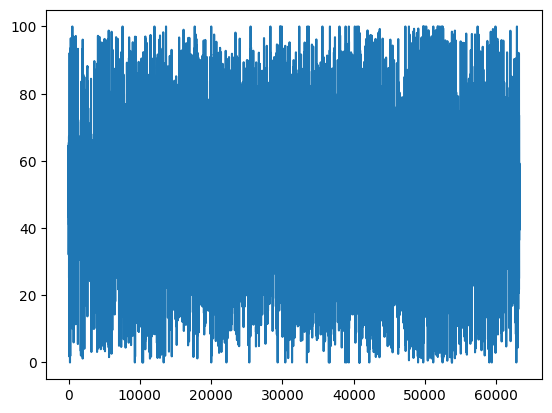

In [22]:


plt.plot(np.array(df["RSI"]))
plt.show()

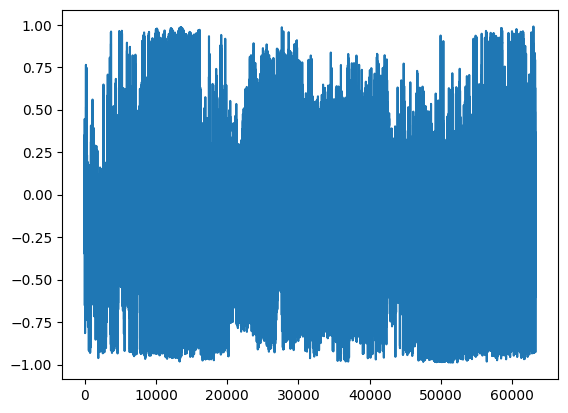

In [23]:
plt.plot(np.array(df["OFI"]))
plt.show()

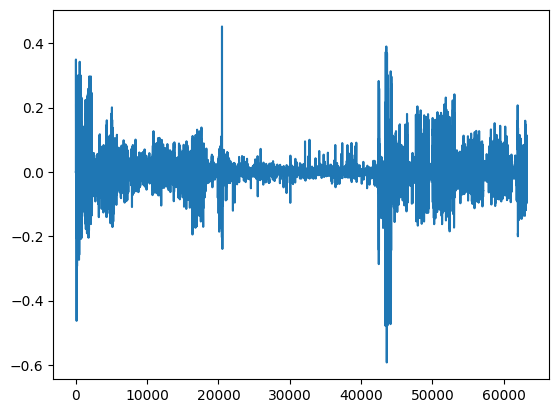

In [24]:
plt.plot(np.array(df["MACD"]))
plt.show()

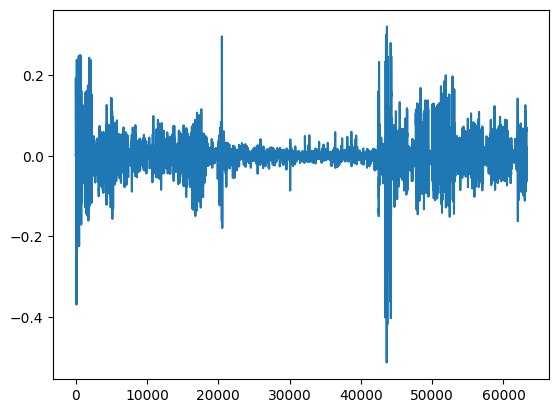

In [25]:
plt.plot(np.array(df["SIGNAL_LINE"]))
plt.show()

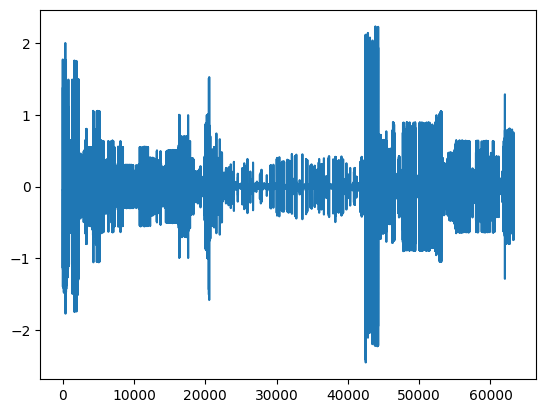

In [26]:
plt.plot(np.array(df["Y2"]))
plt.show()

In [27]:
plt.plot(np.array(df["Volatility"]))
plt.show()

In [28]:
# Drop rows with NaN values to create a new DataFrame 'df3'.
df3 = df.dropna()

# Multiply selected columns by 5 using .loc to avoid SettingWithCopyWarning.
columns_to_multiply_by_5 = ['MACD', 'SIGNAL_LINE', 'Y2', 'OFI']
for column in columns_to_multiply_by_5:
    df3.loc[:, column] = df3.loc[:, column] * 5

# Multiply 'Volatility' column by 100 and 'RSI' by 1/50 using .loc to ensure the operations are done in place.
df3.loc[:, "Volatility"] = df3.loc[:, "Volatility"] * 100
df3.loc[:, "RSI"] = df3.loc[:, "RSI"] / 10 -5

# The updated DataFrame 'df3' can now be used or displayed.
df3

MID_PRICE_close       OFI       RSI      MACD  \
COLLECTION_TIME                                                      
2021-11-03 13:30:20          151.740  0.265306  0.944700  1.057844   
2021-11-03 13:30:21          150.395  0.239892 -0.070064  0.665385   
2021-11-03 13:30:22          150.425  0.847804 -0.035010  0.362286   
2021-11-03 13:30:23          151.765  0.029061  0.682314  0.655160   
2021-11-03 13:30:24          151.765 -0.828543  0.679956  0.877153   
...                              ...       ...       ...       ...   
2021-11-05 19:59:53          150.965 -0.680840 -0.308642  0.372873   
2021-11-05 19:59:54          150.965 -0.352900  0.435631  0.256784   
2021-11-05 19:59:55          151.265  1.257685  0.779927  0.282563   
2021-11-05 19:59:56          151.265  1.159420  0.028490  0.299540   
2021-11-05 20:00:00          151.265 -0.501730  0.854063  0.309427   

                     Volatility  SIGNAL_LINE         EMA     Y1     Y2  
COLLECTION_TIME                                                         
2021-11-03 13:30:20    0.540865     0.740233  151.046076 -0.035 -6.725  
2021-11-03 13:30:21    0.579780     0.725264  150.984069 -1.345  0.150  
2021-11-03 13:30:22    0.510020     0.652668  150.930824  0.030  6.700  
2021-11-03 13:30:23    0.552162     0.653166  151.010269  1.340  0.000  
2021-11-03 13:30:24    0.552148     0.697964  151.082148  0.000 -5.800  
...                         ...          ...         ...    ...    ...  
2021-11-05 19:59:53    0.301691     0.353312  151.137104 -0.470  0.000  
2021-11-05 19:59:54    0.300951     0.334007  151.120714  0.000  1.500  
2021-11-05 19:59:55    0.282988     0.323718  151.134455  0.300  0.000  
2021-11-05 19:59:56    0.258546     0.318882  151.146888  0.000  0.000  
2021-11-05 20:00:00    0.258560     0.316991  151.158137  0.000  0.000  

[63236 rows x 9 columns]

In [29]:
# Create the 'Y' column based on conditions without using apply
df3['Y'] = np.where(df3.loc[:,'Y2'] >= 0.15, 1, np.where(df3.loc[:,'Y2'] <= -0.15, -1, 0))

# Display the DataFrame to verify the new column
df3["Y"].value_counts()

/var/folders/c5/rqgw5w7j12z9v5rttfsqrlt00000gn/T/ipykernel_28348/3704712895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Y'] = np.where(df3.loc[:,'Y2'] >= 0.15, 1, np.where(df3.loc[:,'Y2'] <= -0.15, -1, 0))


Y
 0    46795
-1     8229
 1     8212
Name: count, dtype: int64

In [30]:
df2 = df3.reset_index()
#print(df2)


# Assuming df2 is already defined and reset_index() has been applied
div = int(0.80 * len(df2))

train_start = df2["COLLECTION_TIME"].iloc[0]  # First element
train_end = df2["COLLECTION_TIME"].iloc[div]

test_start = df2["COLLECTION_TIME"].iloc[div + 1]
test_end = df2["COLLECTION_TIME"].iloc[-1]  # Last element

print(train_start)
print(train_end)
print(test_start)
print(test_end)

2021-11-03 13:30:20
2021-11-05 16:00:30
2021-11-05 16:00:31
2021-11-05 20:00:00


In [31]:
df2.columns

Index(['COLLECTION_TIME', 'MID_PRICE_close', 'OFI', 'RSI', 'MACD',
       'Volatility', 'SIGNAL_LINE', 'EMA', 'Y1', 'Y2', 'Y'],
      dtype='object')

In [32]:


def filter_time_window(df1, start_time, end_time):
    df = df1.copy()

    # Convert 'COLLECTION_TIME' column to datetime.time objects if it's not already
    if not isinstance(df['COLLECTION_TIME'].iloc[0], time):
        df['COLLECTION_TIME'] = pd.to_datetime(df['COLLECTION_TIME'])

    # Create the mask to filter the time window
    mask = (df['COLLECTION_TIME'] >= start_time) & (df['COLLECTION_TIME'] < end_time)
    return df[mask]


In [33]:
training_start_time, training_end_time = train_start, train_end
prediction_start_time, prediction_end_time = test_start, test_end

def get_train_test_windows(df, train_start_time, train_end_time, test_start_time, test_end_time):
    training_window_df = None
    test_window_df = None
    
    try:
        training_start_time = pd.to_datetime(train_start_time)
        training_end_time = pd.to_datetime(train_end_time)
        prediction_start_time = pd.to_datetime(test_start_time)
        prediction_end_time = pd.to_datetime(test_end_time)

        # Check if the desired training window is inside the dataset's time range
        if pd.to_datetime(df['COLLECTION_TIME'].min()) <= training_start_time and pd.to_datetime(df['COLLECTION_TIME'].max()) >= training_end_time:
            training_window_df = filter_time_window(df, training_start_time, training_end_time)
            training_window_df.reset_index(drop=True, inplace=True)

        if pd.to_datetime(df['COLLECTION_TIME'].min()) <= prediction_start_time and pd.to_datetime(df['COLLECTION_TIME'].max()) >= prediction_end_time:
            test_window_df = filter_time_window(df, prediction_start_time, prediction_end_time)
            test_window_df.reset_index(drop=True, inplace=True)

        if len(training_window_df) == 0  or len(test_window_df) == 0:
            print("Desired training or prediction window not inside dataset's time range.")
        else:
            return training_window_df, test_window_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

train_df, test_df = get_train_test_windows(df2, training_start_time, training_end_time, prediction_start_time, prediction_end_time)






In [34]:
feature_cols = ['OFI', 'MACD', 'Volatility']
label_cols = ['Y2']

In [35]:


train_features = train_df[feature_cols]
train_labels = train_df[label_cols]
test_features = test_df[feature_cols]
test_labels = test_df[label_cols]

# # Shift labels up by 1 row because we are trying to predict next row's price
# train_labels = train_labels.shift(-1)
# test_labels = test_labels.shift(-1)
# # Remove the last row in training features
# train_features = train_features[:-1]
# train_labels = train_labels[:-1]
# test_features = test_features[:-1]
# test_labels = test_labels[:-1]

print(f"Training features shape: {train_features.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test features shape: {test_features.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training features shape: (50588, 3)
Training labels shape: (50588, 1)
Test features shape: (12646, 3)
Test labels shape: (12646, 1)


In [36]:
# def create_sequences1(features_df, labels_df, sequence_length):
#     # sc_features = MinMaxScaler(feature_range=(0, 1))
#     # sc_labels = MinMaxScaler(feature_range=(0, 1))
    
#     # # Assuming features_df and labels_df are pandas DataFrames
#     # features_np = sc_features.fit_transform(features_df)
#     # labels_np = sc_labels.fit_transform(labels_df)

#     # feature_sequences = []
#     # label_sequences = []

#     # for i in range(len(features_df) - sequence_length):
#     #     # Append sequences of length 'sequence_length' to feature_sequences
#     #     feature_sequences.append(features_np[i:i+sequence_length])
#     #     # Append the next label (after the end of the current sequence) to label_sequences
#     #     label_sequences.append(labels_np[i + sequence_length])

    
#     features_np = features_df
#     labels_np = labels_df

#     feature_sequences = []
#     label_sequences = []

#     for i in range(len(features_df) - sequence_length):
#         # Append sequences of length 'sequence_length' to feature_sequences
#         feature_sequences.append(features_np.iloc[i:i+sequence_length])
#         # Append the next label (after the end of the current sequence) to label_sequences
#         label_sequences.append(labels_np.iloc[i + sequence_length])

#     return np.array(feature_sequences), np.array(label_sequences)#, sc_features, sc_labels
    

# sequence_length = 1
# X_train, y_train = create_sequences1(train_features, train_labels, sequence_length)
# X_test, y_test = create_sequences1(test_features, test_labels, sequence_length)

# # X_train, y_train, sc_features_train, sc_labels_train = create_sequences1(train_features, train_labels, sequence_length)
# # X_test, y_test, sc_features_test, sc_labels_test = create_sequences1(test_features, test_labels, sequence_length)

# # X_train, y_train = create_sequences1(train_features, train_labels, sequence_length)
# # X_test, y_test = create_sequences1(test_features, test_labels, sequence_length)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [37]:
X_train, y_train = np.array(train_features), np.array(train_labels)
X_test, y_test = np.array(test_features), np.array(test_labels)

In [38]:
import numpy as np

# Check if X_train contains NaN values
contains_nan_X = np.isnan(X_train).any()

# Check if y_train contains NaN values
contains_nan_y = np.isnan(y_train).any()

print(f'X_train contains NaN values: {contains_nan_X}')
print(f'y_train contains NaN values: {contains_nan_y}')


# Check if X_train contains NaN values
contains_nan_X = np.isnan(X_test).any()

# Check if y_train contains NaN values
contains_nan_y = np.isnan(y_test).any()

print(f'X_train contains NaN values: {contains_nan_X}')
print(f'y_train contains NaN values: {contains_nan_y}')

X_train contains NaN values: False
y_train contains NaN values: False
X_train contains NaN values: False
y_train contains NaN values: False


In [39]:


from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [40]:


batch_size = 64  # You can adjust the batch size

# For training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

# For testing data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [41]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        # Batch normalization layer
        #self.batch_norm = nn.BatchNorm1d(hidden_dim)
        #self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # Optionally add a ReLU activation here if you find it beneficial
        #self.relu = nn.ReLU()

        
    def forward(self, x):
        out, _ = self.lstm(x)
        #out = self.batch_norm(out)  # Apply batch normalization to the last time step
        #out = self.relu(out)
        out = self.fc(out)
        # out = self.relu(out)  # Uncomment if using ReLU
        # return out
        # out = self.fc(out[:, -1, :])  # we only want the last time step
        return out

# Constants initialization
input_dim = 3
hidden_dim = 20
output_dim = 1
num_layers = 5
learning_rate = 0.001
num_epochs = 40
num_predictions_to_print = 5

# Model, loss function, optimizer, and scheduler initialization
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers, dropout=0.1)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)



for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for i, (features, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Update learning rate
    scheduler.step()

    # After each epoch, evaluate on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        total_loss = 0
        for features, labels in test_loader:
            test_outputs = model(features)
            total_loss += criterion(test_outputs, labels).item()
        avg_loss = total_loss / len(test_loader)
        print(f'Epoch {epoch}/{num_epochs}, Training Loss: {loss.item()}, Test Loss: {avg_loss}')

    # Convert the tensor predictions to a NumPy array
    # and print the first few predictions
    predictions = outputs.detach().numpy()
    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')
    print(f'First {num_predictions_to_print} Predictions:')
    print(predictions[:num_predictions_to_print])
    print("=" * 50)

    

Epoch 0/40, Training Loss: 5.795931339263916, Test Loss: 1.3767062138502646
Epoch 0/40, Loss: 5.795931339263916
First 5 Predictions:
[[ 0.14265865]
 [ 0.24825427]
 [-0.20288706]
 [-0.20507374]
 [-0.12073368]]
Epoch 1/40, Training Loss: 4.195495128631592, Test Loss: 1.0993634698103474
Epoch 1/40, Loss: 4.195495128631592
First 5 Predictions:
[[ 0.9153353 ]
 [ 0.70206463]
 [-1.3361818 ]
 [-1.548533  ]
 [ 1.6735373 ]]
Epoch 2/40, Training Loss: 4.272851467132568, Test Loss: 1.0860339867873023
Epoch 2/40, Loss: 4.272851467132568
First 5 Predictions:
[[ 1.1566774]
 [ 1.2778697]
 [-1.9762988]
 [-1.6790209]
 [ 1.6562197]]
Epoch 3/40, Training Loss: 4.580118656158447, Test Loss: 1.0906201156674686
Epoch 3/40, Loss: 4.580118656158447
First 5 Predictions:
[[ 0.8684579]
 [ 1.2546773]
 [-1.181361 ]
 [-1.217493 ]
 [ 1.2242293]]
Epoch 4/40, Training Loss: 4.697885990142822, Test Loss: 1.087690481069413
Epoch 4/40, Loss: 4.697885990142822
First 5 Predictions:
[[ 0.8311621]
 [ 1.2395265]
 [-2.0133822]


In [42]:
model.eval()

LSTMModel(
  (lstm): LSTM(3, 20, num_layers=5, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)

In [43]:
train_outputs = model(X_train_tensor)

test_outputs = model(X_test_tensor)

In [44]:
# Creating the tensor with the specified values
input_tensor = torch.tensor([0.11, -1.1, 4.2])

#input_tensor = input_tensor.unsqueeze(0)

input_tensor = input_tensor.unsqueeze(0)
# Reshaping the tensor to the size 1x1x4
#input_tensor = input_tensor.view(1, 4)

input_tensor.shape

out = model(input_tensor)
out

tensor([[1.1901]], grad_fn=<AddmmBackward0>)

In [45]:
tr_pred = train_outputs.detach().numpy()

print(tr_pred)

#tr_pred = sc_labels.inverse_transform(tr_pred)



te_pred = test_outputs.detach().numpy()

#te_pred = sc_labels.inverse_transform(te_pred)

print(te_pred)

[[-2.787553  ]
 [ 2.8327792 ]
 [ 3.4728417 ]
 ...
 [ 0.99361295]
 [ 0.86821544]
 [ 0.7894759 ]]
[[ 1.038942  ]
 [-2.478605  ]
 [-2.3790298 ]
 ...
 [ 0.61968756]
 [-0.42254025]
 [-0.58020586]]


In [46]:
y_tr = y_train
y_te = y_test

In [47]:
print(y_tr)
print(y_te)

[[-6.725]
 [ 0.15 ]
 [ 6.7  ]
 ...
 [ 0.1  ]
 [-0.1  ]
 [ 0.   ]]
[[4.25]
 [0.1 ]
 [0.  ]
 ...
 [1.5 ]
 [0.  ]
 [0.  ]]


In [48]:
print(len(tr_pred))
print(len(y_tr))

50588
50588


In [49]:
print(len(te_pred))
print(len(y_te))

12646
12646


In [50]:
y = np.where(y_te >= 0.15, 1, np.where(y_te <= -0.15, -1, 0))


z = np.where(te_pred >= 0.15, 1, np.where(te_pred <= -0.15, -1, 0))


In [51]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y, z)

# Display the confusion matrix
cm


array([[1454,  559,  227],
       [1979, 3478, 2678],
       [ 204,  605, 1462]])

In [52]:
# Total predictions can be computed as the sum of all elements in the confusion matrix.
total_predictions = cm.sum()
# True Positives (TP) are at cm[1, 1] and True Negatives (TN) are at cm[0, 0]
true_positives = cm[2, 2]
true_negatives = cm[0, 0]
b = cm[1,1]

# Calculate accuracy
accuracy = (true_positives + true_negatives+b) / total_predictions

accuracy

0.505614423533133

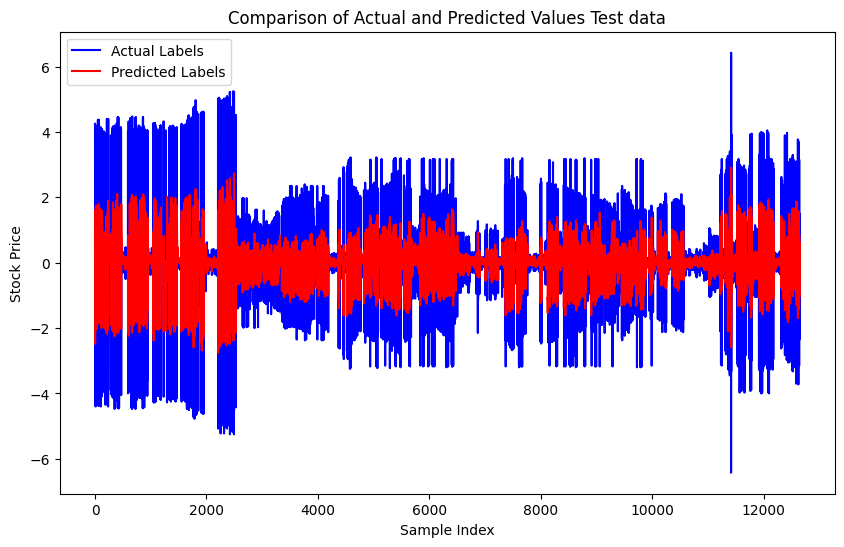

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(y_te, label='Actual Labels', color='blue')
plt.plot(te_pred, label='Predicted Labels', color='red')
plt.title('Comparison of Actual and Predicted Values Test data')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.savefig("images/modelfinal_1.png")
plt.legend()
plt.show()

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(y_te, label='Actual Labels', color='blue')
plt.plot(te_pred, label='Predicted Labels', color='red')
plt.title('Comparison of Actual and Predicted Values Test data')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()

# Set the x-axis limits (xlim) from xmin to xmax
xmin = 9000  # Replace with your desired minimum x-value
xmax = 9200  # Replace with your desired maximum x-value
ymin= -2
ymax = 2
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.savefig("images/modelfinal_2.png")
plt.show()

In [59]:
torch.save(model.state_dict(), 'final_models/modelfinal.pth')

In [60]:
# Convert to TorchScript
model.eval()
scripted_model = torch.jit.script(model)

# Save the scripted model
scripted_model.save('final_models/modelfinal.pt')